# **Machine Learning Series**: Image Classification dengan Convolutional Neural Network (CNN)

### **Statistics Center Diponegoro University**

## **Import Library**

In [ ]:
# Mengimpor pustaka/modul python yang dibutuhkan
import zipfile
import os
import glob 
import warnings

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## **Mempersiapkan Dataset**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muahammadrionandod","key":"d0c9f1dfec82f6af90fcc9cc62f00bc5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 98% 301M/306M [00:03<00:00, 75.8MB/s]
100% 306M/306M [00:03<00:00, 87.9MB/s]


## **Unzip Dataset**

In [ ]:
# melakukan ekstraksi pada file zip
!mkdir datasets
!unzip -qq rockpaperscissors.zip -d dataset
!ls dataset

paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


In [ ]:
import os

dataset = os.path.join('/content/dataset')

print(os.listdir(dataset))

['rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']


## **Pemahaman Data** ***(Data Understanding)***

In [ ]:
data = ['paper', 'scissors', 'rock']

for data in data:
    print(f'{data} images: ', len(os.listdir(f'/content/dataset/{data}')))

    total_image = len(list(glob.iglob("/content/dataset/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

paper images:  712
scissors images:  750
rock images:  726
Total Data Image JPEG     :  2189


In [ ]:
import shutil
base_dir = '/content/dataset/'
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

base_dir = '/content/dataset/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

## **Image Augmentation**

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.4,
                    shear_range = 0.2,
                    brightness_range = [0,1],
                    horizontal_flip=True,
                    vertical_flip= True,
                    fill_mode = 'nearest',
                    validation_split = 0.2) #membagi validation set 20%

In [ ]:
train_generator = datagen.flow_from_directory(                           
	        base_dir,                                                                      
	        target_size=(150,150),                                                          
	        class_mode='categorical',                                                       
          shuffle=True,                                                                   
          subset='training'                                                              
          )

validation_generator = datagen.flow_from_directory(                      
	      base_dir,                                                                     
	      target_size=(150,150),                                                          
	      class_mode='categorical',                                                      
        shuffle=True,
        subset='validation'                                                            
        )


Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


## **Modelling**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.1),                                                  #menambahkan dropout
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [ ]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## **Training Model**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 50s - loss: 1.1053 - accuracy: 0.3600 - val_loss: 1.0899 - val_accuracy: 0.4000 - 50s/epoch - 2s/step
Epoch 2/20
25/25 - 48s - loss: 1.0151 - accuracy: 0.4737 - val_loss: 0.9083 - val_accuracy: 0.5813 - 48s/epoch - 2s/step
Epoch 3/20
25/25 - 48s - loss: 0.8070 - accuracy: 0.6450 - val_loss: 0.8461 - val_accuracy: 0.6000 - 48s/epoch - 2s/step
Epoch 4/20
25/25 - 48s - loss: 0.7333 - accuracy: 0.7000 - val_loss: 0.8081 - val_accuracy: 0.6562 - 48s/epoch - 2s/step
Epoch 5/20
25/25 - 48s - loss: 0.7161 - accuracy: 0.7000 - val_loss: 0.7660 - val_accuracy: 0.6562 - 48s/epoch - 2s/step
Epoch 6/20
25/25 - 48s - loss: 0.6388 - accuracy: 0.7350 - val_loss: 0.6647 - val_accuracy: 0.7375 - 48s/epoch - 2s/step
Epoch 7/20
25/25 - 48s - loss: 0.6175 - accuracy: 0.7350 - val_loss: 0.5956 - val_accuracy: 0.7250 - 48s/epoch - 2s/step
Epoch 8/20
25/25 - 47s - loss: 0.5846 - accuracy: 0.7725 - val_loss: 0.5096 - val_accuracy: 0.7875 - 47s/epoch - 2s/step
Epoch 9/20
25/25 - 47s - loss: 0

## **Model Evaluation**



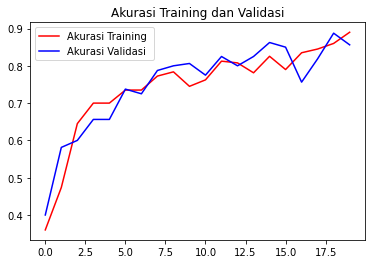

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                  
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()                                                                      
plt.show()

## **Model Prediction**

Saving tangan.jpg to tangan (1).jpg
tangan.jpg
paper


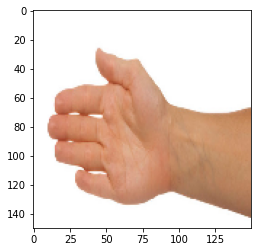

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')